2. [**AQ2**] *Considering the following problem, answer the questions:* 

Alex has a ribbon of <ins>length N</ins>. He wants to cut the ribbon in a way that fulfils the following __three__ conditions:

- Each piece of the cut should have an <ins>integer length</ins> 
- He should <ins>at least</ins> cut the ribbon once
- The __multiplication__ of the length of all the pieces be the <ins>maximum possible</ins> 



1. Implement a __recursive algorithm__ to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail. 

The algorithm will be fed an integer length, which represents the length of the cloth, and it outputs an integer prod, which represents the maximum value that can be obtained from the product from the integers (x,y,z,...) where x+y+z+...=length. So, what the algorithm below does is that it recursively breaks down the length into smaller integers. For example, if length = 10, it tries 1 and 9 first, then it breaks down the 9 into smaller integers. It keeps doing this recursively with all possibilites and stores the largest values obtained.

In [9]:
def ribbon_cut(length):
    if length <5:
        return length
    else:
        rn = range(1,length,1)
        prod = 0
        for i in rn:
            x = ribbon_cut(i) * ribbon_cut(length - i)
            if x > prod:
                prod = x
        return prod       

2. Show that the algorithm has <ins>exponential</ins> running time. 

In [10]:
exec_time = []
inputs = []
for i in range(2,25):
    start = time.time()
    ribbon_cut(i)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i-1)

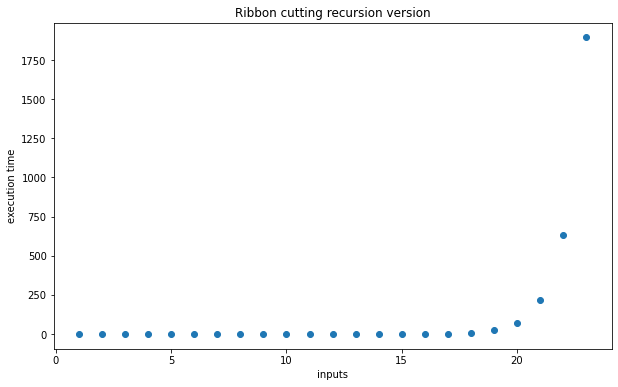

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.title("Ribbon cutting recursion version")
plt.show()

After implementing the function and showing the results, the recursive function has an exponential time complexity as the execution time for the input increases rapidly.

3. Now provide a <ins>polynomial solution</ins>, based on __dynamic programming__, and compute its running-time complexity.


Dynamic programming is a way to optimize recursive code in order to make it more time efficient. The dynamic programming technique used here is called memoization. Memoization is when the output of each input is stored to avoid it being calculated again. As shown in the code below, each result of an input is stored in the list called memo, so it can be retrieved again when the same calculation is needed. As shown in the figure below, the function that uses memoization is extremely efficient as it has a big O(n). Which is extremely efficient and scales really well. 

In [12]:
memo = [0 for i in range(30)]
def ribbon_cut_dyn(length):
    if memo[length]!=0:
        return memo[length]
    else:
        if length <5:
            memo[length] = length
            return length
        else:
            rn = range(1,length,1)
            prod = 0
            for i in rn:
                x = ribbon_cut_dyn(i) * ribbon_cut_dyn(length - i)
                if x > prod:
                    prod = x
            memo[length] = prod
            return prod

In [13]:
exec_time = []
inputs = []
for i in range(2,25):
    start = time.time()
    ribbon_cut_dyn(i)
    end = time.time()
    change = end-start
    exec_time.append(change)
    inputs.append(i)

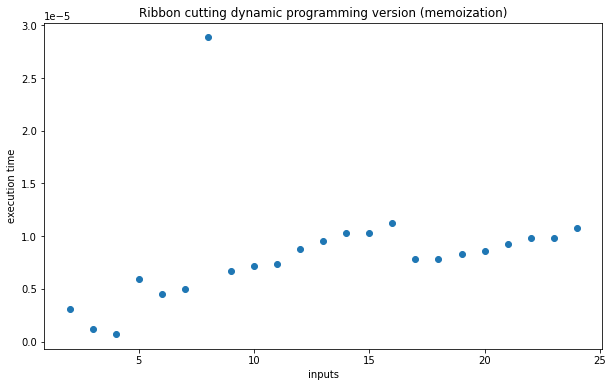

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(inputs, exec_time)
ax.set_xlabel('inputs')
ax.set_ylabel('execution time')
plt.title("Ribbon cutting dynamic programming version (memoization)")
plt.show()

4. Evaluate the <ins>running time</ins> of your algorithm for the sizes (Ns) in the __range of [2, 25]__, plot the results, and interpret it (if you have implemented <ins>two algorithms</ins>, please include both in the plot and compare them). 

As shown in questions 2 and 3, the recursive version without dynamic programming has an exponential time complexity, while the on using it has a linear one. Obviously, the dynamic programming one is much quicker and scales much better for larger inputs as the time taken to compute earlier recursions is already stored. Hence, the number of computations required is much lower and the output is produced significantly faster.